In [1]:
import networkx as nx
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt

%matplotlib inline

In [2]:
def distance(node1,node2):
    '''Simple distance formula between two points'''
    x1 = node1[0]
    x2 = node2[0]
    y1 = node1[1]
    y2 = node2[1]
    return sqrt((x2-x2)**2 + (y2-y1)**2)

def max_distance(points):
    current = 0
    for node1 in points:
        for node2 in points:
            d = distance(node1,node2)
            if d>current: 
                current=d
    return current

def cost_of_min_flow(G):
    flow_path = nx.max_flow_min_cost(G,'source','sink',weight='cost')
    beginning = flow_path['source']
    total_cost = 0
    #import pdb;pdb.set_trace()
    start_paths = [n for n in beginning.items() if n[1]==1]
    for start_node, go in start_paths:        
        curr_node=start_node
        path_cost = 0
        while curr_node!='destination':
            path = [n for n in flow_path[curr_node].items() if n[1]==1]
            node, go = path[0]
            path_cost += G.edge[curr_node][node]['cost']
            curr_node = node
        total_cost += path_cost
    return total_cost


def allocation(passengers, destination, complete=False):
    # passengers is a list of tuples - ID, x, y
    # destination is a tuple
    G=nx.DiGraph()
    # Step 1
    G.add_node("source", type="meta")
    G.add_node("sink", type="meta")
    i = 1
    # Step 2
    for passenger in passengers:
        G.add_node("{}in".format(i), number=i, x=passenger[0], y=passenger[1], type="passenger in")
        G.add_node("{}out".format(i),number=i, x=passenger[0], y=passenger[1], type="passenger out")
        G.add_edge("{}in".format(i), "{}out".format(i), cost=0, capacity=1)
        i+=1
    G.add_node("destination", x=destination[0], y=destination[1], type="destination")
    
    # Step 3
    for node in G.nodes(data=True):
        if node[1]['type']=="passenger in":
            G.add_edge("source", node[0], cost=0, capacity=1)
        
    # Step 4
    # We create n edges, one each of cost SuD and capacity 1 from each 
    # of the exit vertices uout, u ∈ N, to the dropoff vertex n + 1
    for node in G.nodes(data=True):
        if node[1]['type']=="passenger out":
            cost = distance(destination, (node[1]['x'],node[1]['y']))
            name = node[0]
            G.add_edge(name,"destination", cost=cost, capacity=1)
    
    # Step 5
    # Calculating L
    L = len(passengers)*max_distance(passengers + [destination]) + 1
    for u in range(1,len(passengers)+1):
        if complete: 
            start = 1
        else: 
            start = u+1
        for v in range(start, len(passengers)+1):
            if u!=v:
                G.add_edge("{}out".format(u), "{}in".format(v), cost=distance(passengers[u-1], passengers[v-1])-L, capacity=1)
    
    
    
    # Step 6
    
    possible_graphs = [G.copy() for i in range(len(passengers))]
    for i, pg in enumerate(possible_graphs):
        pg.add_edge("destination", "sink", cost=0, capacity=i+1)
    
    min_cost = float('inf')
    min_flow_graph = None
    for pg in possible_graphs:
        c = cost_of_min_flow(pg)
        if c<min_cost:
            min_cost=c
            min_graph=pg
    return min_graph
     

In [3]:
G = allocation([(1,1), (-1,1), (-1,-1), (1,-1)], (0,0))

In [4]:
G.edges(data=True)

[('1in', '1out', {'capacity': 1, 'cost': 0}),
 ('2out', '4in', {'capacity': 1, 'cost': -7.0}),
 ('2out', 'destination', {'capacity': 1, 'cost': 1.0}),
 ('2out', '3in', {'capacity': 1, 'cost': -7.0}),
 ('destination', 'sink', {'capacity': 1, 'cost': 0}),
 ('2in', '2out', {'capacity': 1, 'cost': 0}),
 ('source', '2in', {'capacity': 1, 'cost': 0}),
 ('source', '4in', {'capacity': 1, 'cost': 0}),
 ('source', '1in', {'capacity': 1, 'cost': 0}),
 ('source', '3in', {'capacity': 1, 'cost': 0}),
 ('4in', '4out', {'capacity': 1, 'cost': 0}),
 ('1out', '2in', {'capacity': 1, 'cost': -9.0}),
 ('1out', '4in', {'capacity': 1, 'cost': -7.0}),
 ('1out', 'destination', {'capacity': 1, 'cost': 1.0}),
 ('1out', '3in', {'capacity': 1, 'cost': -7.0}),
 ('4out', 'destination', {'capacity': 1, 'cost': 1.0}),
 ('3in', '3out', {'capacity': 1, 'cost': 0}),
 ('3out', '4in', {'capacity': 1, 'cost': -9.0}),
 ('3out', 'destination', {'capacity': 1, 'cost': 1.0})]

/usr/local/lib/python2.7/site-packages/matplotlib/collections.py:631: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/usr/local/lib/python2.7/site-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


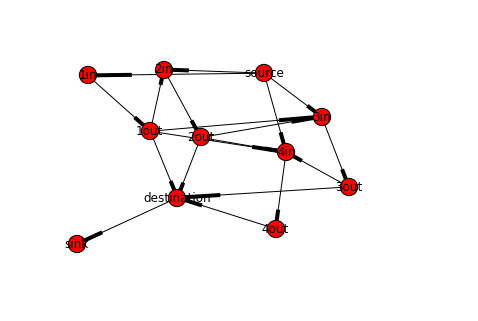

In [5]:
nx.draw_graphviz(G, with_labels=True)

In [6]:
# The path that should be taken
nx.max_flow_min_cost(G,'source','sink',weight='cost')

{'1in': {'1out': 1},
 '1out': {'2in': 1, '3in': 0, '4in': 0, 'destination': 0},
 '2in': {'2out': 1},
 '2out': {'3in': 1, '4in': 0, 'destination': 0},
 '3in': {'3out': 1},
 '3out': {'4in': 1, 'destination': 0},
 '4in': {'4out': 1},
 '4out': {'destination': 1},
 'destination': {'sink': 1},
 'sink': {},
 'source': {'1in': 1, '2in': 0, '3in': 0, '4in': 0}}

In [7]:
cost_of_min_flow(G)

-24.0